# Projekat iz predmeta analiza socijalnih mreza


## Kvantitativna i kvalitativna Analiza stanja profesionalnog muškog tenisa u periodu od 2018. do 2020. godine


Ucitavanje podataka


In [26]:
import pandas as pd

dataPath = "data/atp_matches_2018.csv"

players_dataPath = "data/atp_players.csv"

player_atp_rankings_dataPath = "data/atp_rankings_10s.csv"

data = pd.read_csv(dataPath) 
#print(data.columns)
data.isna().any()

#players
players_data = pd.read_csv(players_dataPath)
#print(players_data)

#atp ranking
players_atp_rank_data = pd.read_csv(player_atp_rankings_dataPath)
players_atp_rank_data.isna().any()
#points null moze biti
#print(players_atp_rank_data)

ranking_date    False
rank            False
player          False
points           True
dtype: bool

In [27]:
#provera da li je match_num kolona koja moze da bude uzeta za id

print(data['match_num'].isnull().values.any())
print(data['match_num'].is_unique)

False
False


In [28]:
#dodati automatski generisani id kao dodatnu kolonu
data['id'] = data.index
print(data)

#sacuvati u novi fajl
import pickle

with open("data/data2018_cleaned.csv", 'wb') as file:
    pickle.dump(data, file)

                          tourney_id                tourney_name surface  \
0                          2018-M020                    Brisbane    Hard   
1                          2018-M020                    Brisbane    Hard   
2                          2018-M020                    Brisbane    Hard   
3                          2018-M020                    Brisbane    Hard   
4                          2018-M020                    Brisbane    Hard   
...                              ...                         ...     ...   
2884                       2018-0605                 Tour Finals    Hard   
2885                       2018-0605                 Tour Finals    Hard   
2886  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2887  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2888  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   

      draw_size tourney_level  tourney_date  match_num  winner_id  \
0            32   

In [29]:
import numpy as np

# Selekcija samo kolona 'match_num' i 'id' i grupisanje po match_num
data_grupisano = data[['match_num', 'id']].groupby('match_num')

# agg() radi agregaciju, u ovom slučaju po broju elemenata u grupi
data_agregirano = data_grupisano['id'].agg(np.size)
print(type(data_agregirano))
print(data_agregirano)

<class 'pandas.core.series.Series'>
match_num
1      67
2      67
4      67
5      35
100     3
       ..
503     1
504     1
601     1
602     1
701     1
Name: id, Length: 233, dtype: int64


In [30]:
data_nonunique = data_agregirano[data_agregirano>1]
print(data_nonunique)

match_num
1      67
2      67
4      67
5      35
100     3
       ..
296    64
297    64
298    64
299    64
300    64
Name: id, Length: 200, dtype: int64


In [31]:
#naci max i index max broja ponovljenih
trazeni = data_nonunique[data_nonunique == data_nonunique.max()]
print(trazeni)
target_match_num = trazeni.keys()[0]
print(target_match_num)

match_num
1    67
2    67
4    67
Name: id, dtype: int64
1


In [32]:
#ispisati sve meceve kao match_num imaju odredjeni max
data_target = data[data['match_num'] == target_match_num]
lista_labela = ['tourney_name', 'winner_id', 'loser_id', 'winner_rank', 'loser_rank']
print(data_target[lista_labela])

#ispisi sve ciji je ili winner_rank null ili loser_rank null
data_winOrlos_is_null = data_target[(data_target['winner_rank'].isnull()) | (data_target['loser_rank'].isnull())]
print(data_winOrlos_is_null)

#istraga o igracima ciji je winner_rank u tabeli matches_2018 null ili loser_rank u tabeli matches_2018 null
print(players_data['player_id'].equals(data_winOrlos_is_null['winner_id']))
players_info_rang_null = players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))]
print(players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))])

#postoje neki koji uopste nemaju upisanu ruku i datum rodjenja, datum rodjenja format double iako u opisu drugaciji format

                     tourney_name  winner_id  loser_id  winner_rank  \
266   Davis Cup G1 R1: AUT vs BLR     105589    125802         98.0   
270   Davis Cup G1 R1: CHI vs ECU     111797    105111         95.0   
273   Davis Cup G1 R1: CHN vs NZL     104907    105842        308.0   
276   Davis Cup G1 R1: COL vs BAR     123755    104656        292.0   
279   Davis Cup G1 R1: DOM vs BRA     105497    106252        284.0   
...                           ...        ...       ...          ...   
2425  Davis Cup WG SF: FRA vs ESP     105332    105807         54.0   
2429  Davis Cup G2 R3: ROU vs POL     105657    111794         81.0   
2433  Davis Cup G2 R3: THA vs LBN     200273    106397        643.0   
2437  Davis Cup G2 R3: URU vs MEX     104655    106250         68.0   
2886   Davis Cup WG F: FRA vs CRO     106432    104871         12.0   

      loser_rank  
266        190.0  
270        597.0  
273        253.0  
276          NaN  
279        365.0  
...          ...  
2425        21

In [33]:
#players_info_rang_null 
#players_atp_rank_data
columns_name_players_atp_rank = ['ranking_date', 'rank', 'player', 'points']
print(players_atp_rank_data[columns_name_players_atp_rank])
print(players_atp_rank_data[columns_name_players_atp_rank].groupby('player').mean())

        ranking_date  rank  player   points
0           20100104     1  103819  10550.0
1           20100104     2  104745   9205.0
2           20100104     3  104925   8310.0
3           20100104     4  104918   7030.0
4           20100104     5  105223   6785.0
...              ...   ...     ...      ...
916291      20191230  1922  134833      1.0
916292      20191230  1922  144856      1.0
916293      20191230  1922  202326      1.0
916294      20191230  1926  207307      1.0
916295      20191230  1927  208186      1.0

[916296 rows x 4 columns]
        ranking_date         rank       points
player                                        
100644  2.015885e+07   247.552326  2102.796512
101389  2.014282e+07  1724.404255     1.000000
101397  2.011134e+07  1204.478261     3.000000
101404  2.011255e+07  1031.626374     6.571429
101549  2.010697e+07  1468.750000     1.000000
...              ...          ...          ...
209397  2.019123e+07  1581.000000     1.000000
209398  2.019122e+07  

In [34]:
import networkx as nx

list_winner = set(data['winner_id'].apply(str).unique())
print(list_winner)
list_loser = set(data['loser_id'].apply(str).unique())
print(list_loser)

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

print(data.columns)

{'104494', '200615', '127570', '105497', '106150', '105882', '105432', '126523', '105311', '106044', '105166', '106078', '104882', '105332', '105539', '105077', '105657', '200325', '106148', '106026', '104586', '105634', '105223', '105526', '105023', '200005', '105583', '103852', '208028', '105819', '103970', '106397', '106298', '105936', '200460', '103333', '105132', '202210', '105554', '106177', '105815', '105155', '105575', '105208', '104607', '106105', '104620', '144750', '106186', '104291', '144760', '105806', '104312', '105916', '120792', '126526', '105413', '104547', '126774', '105349', '126207', '105041', '106421', '105633', '105967', '126174', '111167', '208029', '103917', '104545', '202165', '125802', '104745', '105578', '104792', '103893', '106058', '105589', '200000', '106110', '106210', '110602', '200282', '104871', '134770', '202358', '105063', '103565', '111581', '106000', '109739', '106071', '104660', '104252', '126205', '105902', '133297', '103898', '105064', '200484',

In [35]:
import numpy as np
import matplotlib.pyplot as plt

data_reduced = data[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'id']]

G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

for _, winner_id, winner_name, winner_ioc, loser_id, loser_name, loser_ioc, _ in data_reduced.itertuples():
    winner_id_string = str(winner_id)
    loser_id_string = str(loser_id)
    if (winner_id_string, loser_id_string) in G.edges:
        G.edges[winner_id_string, loser_id_string]['weight'] += 1
    else:
        G.add_edge(winner_id_string, loser_id_string, weight=1)
        winner_attrs = {winner_id_string: {'name': winner_name, 'country': winner_ioc}}
        loser_attrs = {loser_id_string: {'name': loser_name, 'country': loser_ioc}}
        nx.set_node_attributes(G, winner_attrs)
        nx.set_node_attributes(G, loser_attrs)
        


In [36]:
print(data.dtypes)
print(G.edges.data("weight"))
print(nx.get_node_attributes(G, "name"))
print(nx.get_node_attributes(G, "country"))
output_path = "models/undirected_graph_2018.gml"

nx.write_gml(G, output_path)


tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

1.pitanje Koliki je prosecan broj tenisera(saigraca) po svakom teniseru? 
gephi->ucitala graf, Statistics -> Network Overview -> Average Degree

<img src="img/1.pitanje_average_degree" width=500 height=500 />

In [37]:
#2.pitanje Koji teniseri su se susretali sa najvecim brojem drugih tenisera
my_degrees = dict(G.degree()) #dictionary key:value
degree_values = [v for k, v in G.degree()]

print(max(my_degrees.items(), key= lambda x: x[1])) #max u tom dict 

print(nx.get_node_attributes(G, 'name')['104926']) #atribut name za cvor ciji je index rezultat prethodnog upita

('104926', 61)
Fabio Fognini


In [38]:
#3.pitanje Koji teniseri su ucestvovali na najvecem broju (razlicih) turnira?
winner_tourney_columns = ['winner_id', 'tourney_id']
loser_tourney_columns = ['loser_id', 'tourney_id']

dataWinner_tourney = data[winner_tourney_columns].drop_duplicates()
dataWinner_tourney = dataWinner_tourney.rename(columns = {'winner_id': 'player_id'})
print(dataWinner_tourney)

dataLoser_tourney = data[loser_tourney_columns].drop_duplicates()
dataLoser_tourney = dataLoser_tourney.rename(columns = {'loser_id': 'player_id'})
print(dataLoser_tourney)

#unija pobednika i gubitnika sa preimenovanom kolonom player_id, zbog konkatenacije
dataWinnerAndLoserUnion = pd.concat([dataWinner_tourney, dataLoser_tourney], ignore_index=True)
print(dataWinnerAndLoserUnion)

#izbaci duplikate
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.drop_duplicates()
print(dataWinnerAndLoserUnion)

#grupisi po player_id pa izdvoj po sumi
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.groupby('player_id').count()
print(dataWinnerAndLoserUnion)


print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['103333'])

#proveri presek, datawinner.drop_duplicates, dataloser.drop_dupicates pa onda preimenuj kolone u id, unija pa onda drop_duplicates, pa group_by pa count pa onda uzmes resenje


      player_id                      tourney_id
0        105992                       2018-M020
1        111577                       2018-M020
2        104797                       2018-M020
3        200282                       2018-M020
4        111581                       2018-M020
...         ...                             ...
2877     105227                       2018-0605
2878     100644                       2018-0605
2880     104925                       2018-0605
2886     106432  2018-M-DC-2018-WG-M-FRA-CRO-01
2887     105227  2018-M-DC-2018-WG-M-FRA-CRO-01

[1587 rows x 2 columns]
      player_id                      tourney_id
0        104919                       2018-M020
1        111442                       2018-M020
2        106000                       2018-M020
3        105449                       2018-M020
4        105643                       2018-M020
...         ...                             ...
2882     100644                       2018-0605
2885     104925

In [39]:
#4.pitanje Koji teniseri su dobri kandidati za predstavnike profesionalnih tenisera? Da li se i sta se menja ukoliko se umesto jednog bira skup od nekoliko predstavnika? Dobar predstavnik ili predstavnici bi trebalo da budu u kontaktu sa sto vecim skupom tenisera

#proveriti ovaj 2.deo na sta se odnosi????
#mere centralnosti koristim Degree centrality, vise u kontaktu sa drugim teniserima teze da budu predstavnici
import operator
dictionary = dict(nx.degree_centrality(G))
print(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:5])

[('104926', 0.14593301435406697), ('106233', 0.13157894736842105), ('126774', 0.12679425837320574), ('100644', 0.12440191387559808), ('104755', 0.12200956937799043)]


In [40]:
print(nx.get_node_attributes(G, 'name')['104926'])
print(nx.get_node_attributes(G, 'name')['106233'])
print(nx.get_node_attributes(G, 'name')['126774'])
print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['104755'])

Fabio Fognini
Dominic Thiem
Stefanos Tsitsipas
Alexander Zverev
Richard Gasquet


Prvo kreiramo masku koja ce da selektuje sve igrace koji su u skupu igraca koji su igrali mec u 2018
Potom dobijen rezultat grupisemo po drzavi i sortiramo zatim
Najaktivniji su iz SAD, Francuske, Spanije, Nemacke, Italije
Srbija na 9 mestu sa Rusijom i Kanadom sa 7 aktivnih igraca

In [41]:
maska_active_players = players_data['player_id'].isin(skup_id) 
active_players_2018 = players_data[maska_active_players]
data_grupisano = active_players_2018[['player_id', 'country_code']].groupby('country_code')
data_agregirano = data_grupisano['country_code'].agg(np.size)

print(data_agregirano.sort_values(ascending=False).head(20))

country_code
USA    34
FRA    25
ESP    24
GER    18
ITA    17
ARG    15
AUS    14
AUT     8
RUS     7
CAN     7
SRB     7
GBR     6
CZE     6
CRO     6
ROU     6
SVK     6
SUI     6
BRA     6
TPE     6
IND     6
Name: country_code, dtype: int64


Analiza komuna

U realnim mrezama mogu se uociti gusce povezani delovi mreze, odredjeni broj aktera bolje povezani nego sa ostalim clanovima mreze -> grupe ili zajednica. Mogu biti odvojene ili delimicno se preklapati.

Modularnost je mera kvaliteta particionisanja cvorova mreze u odgovarajuce klastere.

1. implementiracemo bottom-up pristup -> Louvain metod
2. primenicemo metriku modularnosti i analizu u Gephi alatu da bismo analizirali izdvojene komune/klastere i prikazali ih

{'105707': 0, '105432': 1, '105226': 0, '106333': 22, '105332': 3, '106148': 4, '106220': 5, '144807': 10, '105757': 22, '105583': 1, '104593': 22, '106398': 3, '111574': 8, '200460': 11, '103333': 0, '105132': 10, '106177': 3, '105155': 10, '126340': 10, '105943': 0, '104607': 10, '202090': 3, '106186': 0, '105493': 10, '105413': 0, '202165': 11, '105566': 12, '104792': 3, '200000': 0, '200624': 8, '133297': 0, '111153': 3, '105649': 10, '200484': 4, '104810': 13, '106415': 5, '104460': 22, '104542': 0, '126530': 14, '104925': 5, '104731': 5, '126939': 15, '126204': 22, '111456': 10, '124022': 11, '106233': 4, '106043': 3, '105688': 22, '105053': 13, '200514': 13, '108739': 22, '106283': 4, '105870': 5, '105065': 8, '105299': 4, '106348': 10, '134886': 11, '105671': 10, '104468': 4, '200274': 22, '207973': 10, '111795': 1, '105341': 4, '104233': 14, '106075': 5, '105985': 13, '105030': 0, '105227': 5, '105952': 4, '121411': 10, '122669': 22, '105561': 13, '200401': 19, '106250': 22, '

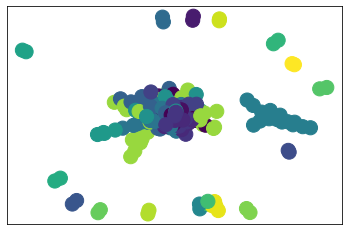

In [42]:
import sys
!{sys.executable} -m pip install python-louvain
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
partition = community_louvain.best_partition(G)

print(partition)

#vizuelno
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=1)
plt.show()


Gephi alat i analiza izdvojenih komuna primenom analize modularnosti


<img src="img/modularity_analysis.png" width=1000 height=1000 />

Po opadajucim vrednostima 5 komuna sa najvecom modularnoscu: 

<img src="img/top5ValueModularityClass.png" width=1000 height=1000 />

Uoceno je da mreze sa vecom modularnoscu podeljene na klastere koji su, unutar sebe, gusto povezani. Ovakve mreze po definiciji, ali i sto se da videti sa prilozenih slika, nemaju veliki broj veza sa ostatkom mreze.

#TODO objasnjenje za detektovane komune, analiziraj tenisere, da li postoji veza izmedju njih i zasto su oni bas bolje povezani.



10. Sprovesti analizu klasterisanja i asortativnu analizu, pa uporediti grupisanje na osnovu zemlje iz koje igrači dolaze, na osnovu broja mečeva koje igraju i na osnovu rejtinga


Lokalni koeficijent klasterizacije se računa kao gustina mreže koju čine posmatrani čvor, njegovi susedi i njihove međusobne veze

Stepen klasterizacije kompletne mreže se računa na osnovu proseka pojedinačnih čvorova


Globalni koeficijent klasterizacije (alternativa)- Posmatra zatvorene trijade unutar mreze u odnosu na sve moguće povezane trijade

In [43]:
player_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print(nx.get_node_attributes(G, 'name')['100644'])
print(len(nx.triangles(G).items()))
newDict = dict(filter(lambda elem: elem[1] > 0,nx.triangles(G).items()))
print(len(newDict))
v=list(newDict.values())
k=list(newDict.keys())
print(k[v.index(max(v))]) 

transitivity = nx.transitivity(G)
print(f"Tranzitivnost {transitivity}")

Max lokalni cc: 0.20000000000000004
Prosečan cc: 0.1222754800160394
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
61   105967  0.003030
202  104122  0.013333
167  106071  0.013767
180  106216  0.014286
5    105132  0.015152
..      ...       ...
184  132482  0.192659
110  200175  0.200000
45   126523  0.200000
85   200218  0.200000
83   104672  0.200000

[204 rows x 2 columns]
Alexander Zverev
419
204
100644
Tranzitivnost 0.23329403817370226


{('200615', '100644'): Text(0.14124635344830128, 0.3482754789389783, '1'),
 ('104755', '126774'): Text(0.4520926171058044, -0.43888832557657786, '2'),
 ('104755', '103819'): Text(0.1814466462863692, 0.44739852418371795, '1'),
 ('104755', '104898'): Text(-0.002631330812700894, 0.08875687939796312, '1'),
 ('104755', '106421'): Text(0.6844043451412424, -0.404208227476375, '1'),
 ('104755', '106000'): Text(0.6282841137091837, 0.5414543848894993, '1'),
 ('104755', '105676'): Text(0.0389177257220828, -0.14242513573436727, '1'),
 ('104755', '106432'): Text(0.06596875715948075, -0.19512902266220644, '1'),
 ('104755', '105341'): Text(0.33635561541366343, 0.5327997607144558, '1'),
 ('104755', '106378'): Text(-0.002631330812700894, 0.02951631688978134, '2'),
 ('104755', '106043'): Text(0.5703137168607975, -0.43538351287884797, '1'),
 ('104755', '104999'): Text(0.96520033498305, -0.11496430746528165, '1'),
 ('104755', '100644'): Text(0.137736891588305, 0.40741206300757926, '1'),
 ('104755', '10558

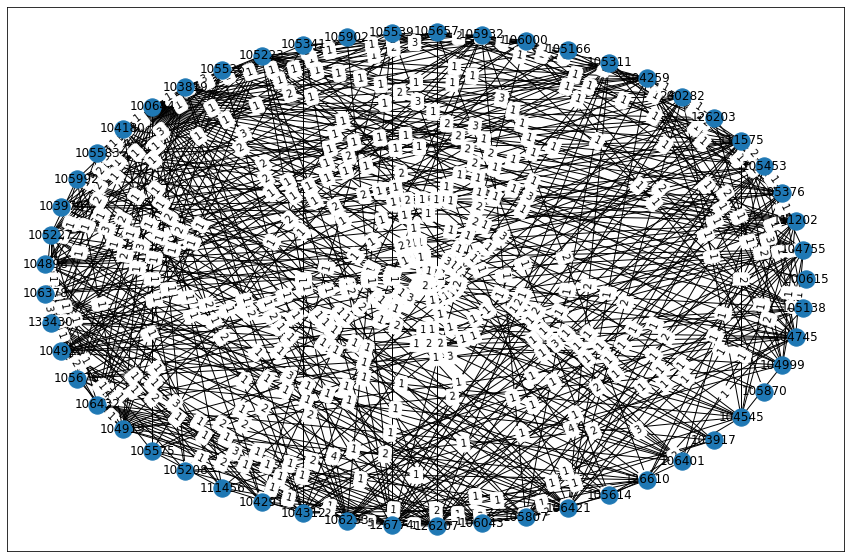

In [44]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, '100644')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Asortativnost:
Homofilija - tendencija ljudi da stvaraju veze sa sebi slicnim ljudima
U analizi socijalnih mreze homofilija u formi asortativnosti - cvorovi imaju tendenciju da se povezuju sa cvorovima slicnog stepena

In [45]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.21868975600564688
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.22945507317379313


In [46]:
#12 Koji teniseri predstavljaju jezgro mreze?
core_number = nx.core_number(G)
print(core_number)#dict

max_core_number = max(core_number.values()) #max value u dict
print(max_core_number)

core = nx.k_core(G, max_core_number)
for player_id in core:
    print(player_id)
    print(nx.get_node_attributes(G, 'name')[player_id])

{'105707': 2, '105432': 6, '105226': 2, '106333': 1, '105332': 20, '106148': 19, '106220': 1, '144807': 1, '105757': 1, '105583': 20, '104593': 1, '106398': 1, '111574': 1, '200460': 2, '103333': 18, '105132': 6, '106177': 2, '105155': 4, '126340': 1, '105943': 2, '104607': 19, '202090': 1, '106186': 5, '105493': 1, '105413': 5, '202165': 1, '105566': 1, '104792': 20, '200000': 11, '200624': 1, '133297': 3, '111153': 1, '105649': 2, '200484': 5, '104810': 1, '106415': 18, '104460': 4, '104542': 10, '126530': 2, '104925': 20, '104731': 20, '126939': 1, '126204': 2, '111456': 16, '124022': 2, '106233': 20, '106043': 20, '105688': 1, '105053': 4, '200514': 1, '108739': 1, '106283': 4, '105870': 6, '105065': 12, '105299': 1, '106348': 1, '134886': 1, '105671': 9, '104468': 20, '200274': 1, '207973': 1, '111795': 1, '105341': 13, '104233': 2, '106075': 11, '105985': 2, '105030': 2, '105227': 20, '105952': 1, '121411': 1, '122669': 2, '105561': 2, '200401': 1, '106250': 2, '111190': 1, '1061

In [47]:
#13 Ko su teniseri koji povezuju razlicite grupe u okviru mreze -> pronalazimo bridgeve u ovkviru mreze grane koje povezuju razlicite grupe u okviru mreze
bridges = nx.bridges(G)
list(bridges)

[('106333', '200436'),
 ('106220', '105311'),
 ('144807', '105575'),
 ('105757', '111197'),
 ('104593', '106210'),
 ('106398', '105064'),
 ('111574', '104719'),
 ('200460', '200045'),
 ('105132', '207973'),
 ('126340', '105747'),
 ('202090', '104797'),
 ('105493', '106121'),
 ('202165', '207176'),
 ('202165', '105812'),
 ('105566', '138845'),
 ('104792', '200611'),
 ('200624', '126207'),
 ('133297', '138431'),
 ('111153', '111581'),
 ('104810', '200059'),
 ('126939', '207836'),
 ('106233', '105299'),
 ('105688', '200620'),
 ('105688', '200619'),
 ('200514', '110602'),
 ('108739', '106175'),
 ('106348', '105173'),
 ('134886', '127143'),
 ('104468', '105515'),
 ('104468', '104970'),
 ('200274', '106250'),
 ('111795', '105932'),
 ('104233', '105747'),
 ('105952', '106249'),
 ('121411', '105349'),
 ('122669', '105156'),
 ('200401', '134217'),
 ('106250', '200620'),
 ('106250', '126190'),
 ('111190', '104918'),
 ('106174', '105933'),
 ('108763', '104655'),
 ('126125', '105453'),
 ('200711',

14. Kolika je gustina svake od modelovanih mreza? 
Gustina mreza moze se odrediti iz Gephi alata (Statistics -> Graph density) 
Racuna se za neusmerene grafove kao d = (2m)/n(n-1)
m -> broj grana
n -> broj cvorova

Rezultat:
<img src="img/graph_density.png" width=1000 height=1000 />

In [48]:
#koristeci python i networkx
density = nx.density(G)
print(f"Gustina mreze koristeci biblioteku network x je: {density}")


Gustina mreze koristeci biblioteku network x je: 0.028422651334345846


In [49]:
#15 U kojoj mrezi povezane i centralizovane mreze
#izracunacemo degree_centrality, closeness_centrality, information_centrality, betweenes_centrality i opisacemo znacenje tih vrednosti
DC = nx.degree_centrality(G)
import operator
print(sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:5])
#vazni cvorovi imaju veliki broj konekcija; broj direktnih suseda svakog cvora u mrezi
#akteri u mrezi sa vecim brojem relacija manje zavisni u odnosu na druge aktere

CC = nx.closeness_centrality(G)
print(sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:5])
#vazni cvorovi su blizi drugim cvorovima, vazniji cvorovi centralniji polozaj u mrezi

BC = nx.betweenness_centrality(G)
print(sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:5])
#vazni cvorovi povezuju druge cvorove, mostovi posrednici izmedju ostalih cvorova u mrezi
#vazni cvorovi se nalaze na vecem broju najkracih putanja

#check if graph is connected
print(nx.is_connected(G))

#graf nije povezan ne moze se izracunati information_centrality
#nije povezan postoji grupa ljudi koji nisu igrali jedni sa drugima

[('104926', 0.14593301435406697), ('106233', 0.13157894736842105), ('126774', 0.12679425837320574), ('100644', 0.12440191387559808), ('104755', 0.12200956937799043)]
[('104926', 0.38868304352899985), ('106233', 0.3877373426931629), ('111575', 0.3863273887197332), ('104269', 0.3835380212921539), ('105173', 0.3817007134057244)]
[('104655', 0.06984202008882844), ('104291', 0.04386650942308229), ('104926', 0.033726444430694766), ('105657', 0.031028324113313705), ('106210', 0.030991357611591407)]
False


In [50]:
#habovi su vezani za degree_centrality i susedima onim sa najvecim vrednostima ove metrike
